# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

This project consists of a Multi-Linear Regression model, trained to predict the expected sale price of a house in Ames, IA based on known characteristics of the unit. Using a dataset from Kaggle.com, we sought to address the following question:

Ideally, using the data available we would like to be able to generalise this model across other cities and still be able to predict with a lower variance from actual data. In reality, we would expect there to be a drop in performance when we attempt to utilise the model created specificially from Ames Housing Data for another city. This in consequence will result in the requirement of additional data from each individual city in question if we want to attempt to achieve generalise for housing data across the USA. Hence, we would rather narrow our scope to at least be able to get a small glimspe on what property features are most important in accurately predicting sale prices of units in Ames, IA? We would also attempt to answer the question of what modeling approach yields the most accurate sale price predictions?


## Executive Summary

In Project 2, we worked with Kaggle data on building sales in Ames, IA that occurred during 2006-2010 to better understand the factors influencing sale prices. We used this understanding to optimize linear regression models, which we then used to make value predictions on Kaggle's test data. We optimized to return the minimum Root Mean Squared Error (RMSE), which Kaggle calculates.

Through the modeling process, we identified a number of key factors and useful methods to build a high-accuracy linear regression model that may be use to predict housing prices for users searching in Ames.

### Contents:
1. [**Data Cleanup**](#Data-Cleanup)
 - [Type of Variables](#Type-of-Variables) 
 - [Continuous Variables Editing](#Continuous-Variables-Editing)
 - [Discrete Variable Editing](#Discrete-Variable-Editing)
 - [Ordinal Variable Editing](#Ordinal-Variable-Editing)
 - [Nominal Variable Editing](#Nominal-Variable-Editing) 
 - [Apply the changes done to the train set to the test set](#Apply-the-changes-done-to-the-train-set-to-the-test-set)
 
  
2. [**EDA**](#EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#allow viewing of all variables in pandas
pd.set_option('max_columns', 200)

In [3]:
df_housing = pd.read_csv('../datasets/train.csv')

In [4]:
df_test = pd.read_csv('../datasets/test.csv')

In [5]:
df_housing.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
df_housing.shape

(2051, 81)

In [7]:
df_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## Data Cleanup

As part of Data Cleanup, we applied the following techniques:
- Reformat Column Names
- Identify and Resolve Null Values
- Identify Outliers
- Examine the Data

In [8]:
df_housing.columns = [title.lower().replace(' ', '_') for title in df_housing.columns]

In [9]:
df_housing[df_housing['gr_liv_area'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [10]:
# It is mentioned in the documentation that there is outliers in both the train and test set 
# I choose to remove outliers in the training set only to improve the modeling
outliers_drop = df_housing['gr_liv_area'] > 4000
df_housing = df_housing[~outliers_drop]
df_housing.shape

(2049, 81)

In [11]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2049 non-null   int64  
 1   pid              2049 non-null   int64  
 2   ms_subclass      2049 non-null   int64  
 3   ms_zoning        2049 non-null   object 
 4   lot_frontage     1719 non-null   float64
 5   lot_area         2049 non-null   int64  
 6   street           2049 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2049 non-null   object 
 9   land_contour     2049 non-null   object 
 10  utilities        2049 non-null   object 
 11  lot_config       2049 non-null   object 
 12  land_slope       2049 non-null   object 
 13  neighborhood     2049 non-null   object 
 14  condition_1      2049 non-null   object 
 15  condition_2      2049 non-null   object 
 16  bldg_type        2049 non-null   object 
 17  house_style   

In [12]:
# check which variables requires editing for null values
df_housing.isnull().sum()[df_housing.isnull().sum() > 0]

lot_frontage       330
alley             1909
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2041
fence             1649
misc_feature      1985
dtype: int64

### Type of Variables

From the data dictionary provided we know that there is 4 types of data in the 82 columns. They include 23 nominal, 23 oridinal, 14 discrete and 20 continuous variables and 2 additional observation identifiers.

I will resolves the null values via the 4 main data types and also do relevant feature engineering to make the data set compatible to the algorithm and improve the performance of the models.

### Continuous Variables Editing

Continuous:

- Lot Frontage 1721 non-null float64
- BsmtFin SF 1 2050 non-null float64
- BsmtFin SF 2 2050 non-null float64
- Bsmt Unf SF 2050 non-null float64
- Total Bsmt SF 2050 non-null float64
- Garage Area 2050 non-null float64
- Mas Vnr Area 2029 non-null float64

In [13]:
df_housing[df_housing['bsmtfin_sf_1'].isnull() == True]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [14]:
# we observer that for this house there is no basement data at all so we impute all the basement data with 0 value
df_housing['bsmtfin_sf_1'].fillna(0, inplace = True)
df_housing['bsmtfin_sf_2'].fillna(0, inplace = True)
df_housing['bsmt_unf_sf'].fillna(0, inplace = True)
df_housing['total_bsmt_sf'].fillna(0, inplace = True)

In [15]:
df_housing[df_housing['garage_area'].isnull() == True]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [16]:
df_housing['garage_area'].fillna(0, inplace = True)

In [17]:
df_housing['mas_vnr_area'] = df_housing['mas_vnr_area'].fillna(0)

In [18]:
# for lot frontage there is 330 null values it makes no sense to impute the value with 0
# since the there is neighborhood data available we can impute missing data with the mean lot frontage for each neighborhood
neigh_means = round(df_housing.groupby('neighborhood')['lot_frontage'].mean(), 2)

# we fill the missing data with the relevant neighborhood
df_housing['lot_frontage'] = df_housing['lot_frontage'].fillna(df_housing['neighborhood'])

# we replace it with the relevant mean data
df_housing['lot_frontage'] = df_housing['lot_frontage'].map(lambda x: neigh_means[x] if type(x) == str else x)

# the left over null values are for GrnHill & Landmrk will be impute with 0 values
df_housing['lot_frontage'].fillna(0, inplace = True)

Imputation was done on lot_frontage through the usage of mean as there are 330 null values just for this single feature discarding the rows will result in greater than 10% reduction in your training set which will definitely impact the modeling performance.

### Discrete Variable Editing

Discrete:

- Bsmt Full Bath 2049 non-null float64
- Bsmt Half Bath 2049 non-null
- Garage Yr Blt 1937 non-null float64
- Garage Cars 2050 non-null float64

In [19]:
df_housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2049.0,1.473676e+03,8.442481e+02,1.0,753.0,1481.0,2199.0,2930.0
pid,2049.0,7.134001e+08,1.886859e+08,526301100.0,528458130.0,535453160.0,907176010.0,924152030.0
ms_subclass,2049.0,5.702538e+01,4.283727e+01,20.0,20.0,50.0,70.0,190.0
lot_frontage,2049.0,6.937576e+01,2.115173e+01,0.0,60.0,70.0,80.0,313.0
lot_area,2049.0,1.002468e+04,6.608512e+03,1300.0,7500.0,9405.0,11500.0,159000.0
overall_qual,2049.0,6.108346e+00,1.421780e+00,1.0,5.0,6.0,7.0,10.0
overall_cond,2049.0,5.562714e+00,1.104897e+00,1.0,5.0,5.0,6.0,9.0
year_built,2049.0,1.971673e+03,3.017129e+01,1872.0,1953.0,1974.0,2001.0,2010.0
year_remod/add,2049.0,1.984166e+03,2.103279e+01,1950.0,1964.0,1993.0,2004.0,2010.0
mas_vnr_area,2049.0,9.773694e+01,1.719364e+02,0.0,0.0,0.0,158.0,1600.0


In [20]:
df_housing[df_housing['bsmt_full_bath'].isnull() == True]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [21]:
df_housing['bsmt_full_bath'].fillna(0, inplace = True)

In [22]:
df_housing[df_housing['bsmt_half_bath'].isnull() == True]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,0.0,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,0.0,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [23]:
df_housing['bsmt_half_bath'].fillna(0, inplace = True)

In [24]:
df_housing[df_housing['garage_cars'].isnull() == True]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,0.0,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,150909


In [25]:
df_housing['garage_cars'].fillna(0, inplace = True)

In [26]:
df_housing[df_housing['garage_yr_blt'] > 2010][['garage_yr_blt', 'year_built']]

,garage_yr_blt,year_built
1699,2207.0,2006


In [27]:
# since the data is from 2006 to 2010 it's a typo I impute it with the year the house was built
df_housing.loc[1699, 'garage_yr_blt'] = 2006

In [28]:
# for the missing values of garage_yr_blt I will impute with data from year the house was built
df_housing['garage_yr_blt'] = df_housing['garage_yr_blt'].fillna(df_housing['year_built'])

In [29]:
df_housing.head(10)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,72.77,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.00,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.00,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.00,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.00,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.00,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.00,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,75.19,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,62.80,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,42

There is an outlier point for garage_yr_blt where it's year 2207. This is definitely a input error as the data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. We impute this single data entry error with the year in which the house was built as it is likely that housing that come with garages are built at the same time.

Apart from that there is also 114 null values that require imputation. We utilise the same concept as before and do so for all the missing values.

### Ordinal Variable Editing

Ordinal:

- Lot Shape 2051 non-null object 
- Utilities 2051 non-null object 
- Land Slope 2051 non-null object 
- Electrical 2051 non-null object 
- Functional 2051 non-null object
- Paved Drive 2051 non-null object
- Exter Qual 2051 non-null object 
- Exter Cond 2051 non-null object  
- Heating QC 2051 non-null object 
- Kitchen Qual 2051 non-null object 
- Garage Finish 1937 non-null object
- Garage Qual 1937 non-null object
- Garage Cond 1937 non-null object 
- Bsmt Qual 1996 non-null object
- Bsmt Cond 1996 non-null object
- Bsmt Exposure 1993 non-null object
- BsmtFin Type 1 1996 non-null object
- BsmtFin Type 2 1995 non-null object
- Fireplace Qu 1051 non-null object
- Pool QC 9 non-null object
- Fence 400 non-null object

In [30]:
df_housing['lot_shape'] = df_housing['lot_shape'].map({'Reg': 0,
                                                       'IR1': 1,
                                                       'IR2': 2,
                                                       'IR3': 3})

In [31]:
df_housing['utilities'] = df_housing['utilities'].map({'AllPub': 0,
                                                       'NoSewr': 1,
                                                       'NoSeWa': 2,
                                                       'ELO': 3})

In [32]:
df_housing['land_slope'] = df_housing['land_slope'].map({'Gtl': 0,
                                                         'Mod': 1,
                                                         'Sev': 2})

In [33]:
df_housing['electrical'] = df_housing['electrical'].map({'SBrkr': 0,
                                                         'Mix': 1,
                                                         'FuseP': 2,
                                                         'FuseF': 3,
                                                         'FuseA': 4})

In [34]:
df_housing['functional'] = df_housing['functional'].map({'Typ': 7,
                                                         'Min1': 6,
                                                         'Min2': 5,
                                                         'Mod': 4,
                                                         'Maj1': 3,
                                                         'Maj2': 2,
                                                         'Sev': 1,
                                                         'Sal': 0})

In [35]:
df_housing['paved_drive'] = df_housing['paved_drive'].map({'N': 0,
                                                           'P': 1,
                                                           'Y': 2})

In [36]:
# exter_qual, exter_cond, heating_qc, kitchen_qual have 5 categories hence we can group them together
for col in ['exter_qual', 'exter_cond', 'heating_qc', 'kitchen_qual']:
    df_housing[col] = df_housing[col].map({'Ex': 5,
                                           'Gd': 4,
                                           'TA': 3,
                                           'Fa': 2,
                                           'Po': 1})

In [37]:
# we group the left over garage columns together
garage_null = df_housing[df_housing['garage_finish'].isnull() == True]
garage_null[['garage_area', 'garage_finish', 'garage_qual', 'garage_cond']].head(20)

,garage_area,garage_finish,garage_qual,garage_cond
28,0.0,NaN,NaN,NaN
53,0.0,NaN,NaN,NaN
65,0.0,NaN,NaN,NaN
79,0.0,NaN,NaN,NaN
101,0.0,NaN,NaN,NaN
103,0.0,NaN,NaN,NaN
114,0.0,NaN,NaN,NaN
120,0.0,NaN,NaN,NaN
134,0.0,NaN,NaN,NaN
136,0.0,NaN,NaN,NaN


In [38]:
# it is observed that the null datas are houses without garages
df_housing['garage_finish'] = df_housing['garage_finish'].fillna('none')
df_housing['garage_qual'] = df_housing['garage_qual'].fillna('none')
df_housing['garage_cond'] = df_housing['garage_cond'].fillna('none')

In [39]:
# we can group garage_qual and garage_cond together
for col in ['garage_qual', 'garage_cond']:
    df_housing[col] = df_housing[col].map({'Ex': 5,
                                           'Gd': 4,
                                           'TA': 3,
                                           'Fa': 2,
                                           'Po': 1,
                                           'none': 0})

In [40]:
df_housing['garage_finish'] = df_housing['garage_finish'].map({'Fin': 3,
                                                               'RFn': 2,
                                                               'Unf': 1,
                                                               'none': 0})

In [41]:
# we can group bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2
basement_null = df_housing[df_housing['bsmt_exposure'].isnull() == True]
basement_null[['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 
               'bsmtfin_sf_1', 'bsmtfin_sf_2']].head(20)

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmtfin_sf_1,bsmtfin_sf_2
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [42]:
# we can see that there is no area for both type 1 or type 2 basement hence we can fill it we 0 values
for col in ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']:
    df_housing[col] = df_housing[col].fillna('none')

In [43]:
for col in ['bsmt_qual', 'bsmt_cond']:
    df_housing[col] = df_housing[col].map({'Ex': 5,
                                           'Gd': 4,
                                           'TA': 3,
                                           'Fa': 2,
                                           'Po': 1,
                                           'none': 0})

In [44]:
for col in ['bsmtfin_type_1', 'bsmtfin_type_2']:
    df_housing[col] = df_housing[col].map({'GLQ': 6,
                                           'ALQ': 5,
                                           'BLQ': 4,
                                           'Rec': 3,
                                           'LwQ': 2,
                                           'Unf': 1,
                                           'none': 0})

In [45]:
df_housing['bsmt_exposure'] = df_housing['bsmt_exposure'].map({'Gd': 4,
                                                               'Av': 3,
                                                               'Mn': 2,
                                                               'No': 1,
                                                               'none': 0})

In [46]:
# check that fireplaces is 0 and then replace fireplace_qu to 0
for col in ['fireplaces' == 0]:
    df_housing['fireplace_qu'] = df_housing['fireplace_qu'].fillna('none')

In [47]:
df_housing['fireplace_qu'] = df_housing['fireplace_qu'].map({'Ex': 5,
                                                             'Gd': 4,
                                                             'TA': 3,
                                                             'Fa': 2,
                                                             'Po': 1,
                                                             'none': 0})

In [48]:
# check that pool_area is 0 and then replace pool_qc to 0
for col in ['pool_area' == 0]:
    df_housing['pool_qc'] = df_housing['pool_qc'].fillna('none')

In [49]:
df_housing['pool_qc'] = df_housing['pool_qc'].map({'Ex': 5,
                                                   'Gd': 4,
                                                   'TA': 3,
                                                   'Fa': 2,
                                                   'Po': 1,
                                                   'none': 0})

In [50]:
df_housing['fence'] = df_housing['fence'].fillna('none')

In [51]:
# since there is 2 seperate category with Good will be 2 while Minimum will be 1
df_housing['fence'] = df_housing['fence'].map({'GdPrv': 2,
                                               'GdWo': 2,
                                               'MnPrv': 1,
                                               'MnWw': 1,
                                               'none': 0})

Ordinal variables requires important scale, if the order of the values are not orderered properly it will adversely affected the performance of the model. For all the ordinal variables that we have reordered, they utilise the available dictionary to discrete the different class of variables and I ordered them from an ascending scale from 1 while 0 is use to represent null values.

### Nominal Variable Editing

Nominal:

- Alley 140 non-null object
- Mas Vnr Type 2029 non-null object
- Garage Type 1938 non-null object
- Misc Feature 65 non-null object
- Garage Type 1938 non-null object

In [52]:
# convert the alley column into 1/0 and create a additional column for gravel alley and paved alley
df_housing['alley'] = df_housing['alley'].fillna(0)
df_housing['alley_grvl'] = df_housing['alley'].map(lambda x: 1 if x == 'Grvl' else 0)
df_housing['alley_grvl'] = df_housing['alley'].map(lambda x: 1 if x == 'Pave' else 0)
df_housing['alley'] = df_housing['alley'].map(lambda x: 1 if x != 0 else 0)

In [53]:
# convert null values in misc_features and create the relevant dummy columns
df_housing['misc_feature'] = df_housing['misc_feature'].fillna('none')
df_housing = pd.get_dummies(df_housing, columns = ['misc_feature'])

In [54]:
# same steps is repeated for mas_vnr_type
df_housing['mas_vnr_type'] = df_housing['mas_vnr_type'].fillna('None')
df_housing = pd.get_dummies(df_housing, columns = ['mas_vnr_type'])

In [55]:
# same steps is also repeated for garage_type
df_housing['garage_type'] = df_housing['garage_type'].fillna('none')
df_housing = pd.get_dummies(df_housing, columns = ['garage_type'])

In [56]:
# drop dummy variables columns from N to N-1
df_housing.columns = [title.lower().replace(' ', '_') for title in df_housing.columns]
df_housing.drop('misc_feature_none', axis = 1, inplace = True)
df_housing.drop('mas_vnr_type_none', axis = 1, inplace = True)
df_housing.drop('garage_type_none', axis = 1, inplace = True)

In [57]:
# encode all nominal variables with no null values into dummies
df_housing = pd.get_dummies(df_housing, columns = ['ms_subclass',
                                                   'ms_zoning',
                                                   'street',
                                                   'land_contour',
                                                   'lot_config',
                                                   'neighborhood',
                                                   'condition_1',
                                                   'condition_2',
                                                   'bldg_type',
                                                   'house_style',
                                                   'roof_style',
                                                   'roof_matl',
                                                   'exterior_1st',
                                                   'exterior_2nd',
                                                   'foundation',
                                                   'heating',
                                                   'central_air',
                                                   'sale_type'], drop_first = True)

# dummy variables are first letter upper cased so we need to convert them to lower cases again
df_housing.columns = [title.lower().replace(' ', '_') for title in df_housing.columns]

In [58]:
# final training data set check 
df_housing.isnull().sum()[df_housing.isnull().sum() > 0]

Series([], dtype: int64)

In [59]:
df_housing.isnull().sum().sum()

0

Nominal variables have to turn into dummy variables as they do not have any qunatitative value and are just labels. When turning nominla variables to dummy variables it is important to ensure that you drop 1 column so that N changes to N minus 1 as pandas would be able to infer the last remaining category.

### Apply the changes done to the train set to the test set

Since we have already done the necessary cleaning and imputation for the training set, we can utilise the same code to create a function so that we can clean the test set more conveninently

In [60]:
def cleanup_function(data):
    data.columns = [title.lower().replace(' ', '_') for title in data.columns]
    
    # I choose not to drop the outliers that has > 4000 living area in the test set 
          
    # continuous variables editing
    data['bsmtfin_sf_1'].fillna(0, inplace = True)
    data['bsmtfin_sf_2'].fillna(0, inplace = True)
    data['bsmt_unf_sf'].fillna(0, inplace = True)
    data['total_bsmt_sf'].fillna(0, inplace = True)
    data['garage_area'].fillna(0, inplace = True)
    data['mas_vnr_area'] = data['mas_vnr_area'].fillna(0)
    neigh_means = round(data.groupby('neighborhood')['lot_frontage'].mean(), 2)
    data['lot_frontage'] = data['lot_frontage'].fillna(data['neighborhood'])
    data['lot_frontage'] = data['lot_frontage'].map(lambda x: neigh_means[x] if type(x) == str else x)
    data['lot_frontage'].fillna(0, inplace = True)
    
    # discrete variable editing
    data['bsmt_full_bath'].fillna(0, inplace = True)
    data['bsmt_half_bath'].fillna(0, inplace = True)
    data['garage_cars'].fillna(0, inplace = True)
    data['garage_yr_blt'] = data['garage_yr_blt'].fillna(data['year_built'])
    
    # ordinal variable editing
    data['lot_shape'] = data['lot_shape'].map({'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})
    data['utilities'] = data['utilities'].map({'AllPub': 0, 'NoSewr': 1, 'NoSeWa': 2, 'ELO': 3})
    data['land_slope'] = data['land_slope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})
    data['functional'] = data['functional'].map({'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2,
                                                 'Sev': 1, 'Sal': 0})
    data['paved_drive'] = data['paved_drive'].map({'N': 0, 'P': 1, 'Y': 2})
    for col in ['exter_qual', 'exter_cond', 'heating_qc', 'kitchen_qual']:
        data[col] = data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

    # garage group        
    data['garage_qual'] = data['garage_qual'].fillna('none')
    data['garage_cond'] = data['garage_cond'].fillna('none')
    data['garage_finish'] = data['garage_finish'].fillna('none')
    df_test['garage_finish'] = df_test['garage_finish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'none':0})
    for col in ['garage_qual', 'garage_cond']:
        data[col] = data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
    data.columns = [title.lower().replace(' ', '_') for title in data.columns]
    
    # basement group
    for col in ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']:
        data[col] = data[col].fillna('none')
    for col in ['bsmt_qual', 'bsmt_cond']:
        data[col] = data[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
    for col in ['bsmtfin_type_1', 'bsmtfin_type_2']:
        data[col] = data[col].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'none': 0})
    data['bsmt_exposure'] = data['bsmt_exposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'none': 0})
    
    for col in ['fireplaces' == 0]:
        data['fireplace_qu'] = data['fireplace_qu'].fillna('none')
    data['fireplace_qu'] = data['fireplace_qu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}) 
    for col in ['pool_area' == 0]:
        data['pool_qc'] = data['pool_qc'].fillna('none')
    data['pool_qc'] = data['pool_qc'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0})
    data['fence'] = data['fence'].fillna('none')    
    data['fence'] = data['fence'].map({'GdPrv': 2, 'GdWo': 2, 'MnPrv': 1, 'MnWw': 1, 'none': 0})
    
    # nominal variables editing
    data['alley'] = data['alley'].fillna(0)
    data['alley_grvl'] = data['alley'].map(lambda x: 1 if x == 'Grvl' else 0)
    data['alley_grvl'] = data['alley'].map(lambda x: 1 if x == 'Pave' else 0)
    data['alley'] = data['alley'].map(lambda x: 1 if x != 0 else 0)
    
    data['misc_feature'] = data['misc_feature'].fillna('none')
    data = pd.get_dummies(data, columns = ['misc_feature'])
    data['mas_vnr_type'] = data['mas_vnr_type'].fillna('None')
    data = pd.get_dummies(data, columns = ['mas_vnr_type'])
    data['garage_type'] = data['garage_type'].fillna('none')
    data = pd.get_dummies(data, columns = ['garage_type'])
    data.columns = [title.lower().replace(' ', '_') for title in data.columns]
    data.drop('misc_feature_none', axis = 1, inplace = True)
    data.drop('mas_vnr_type_none', axis = 1, inplace = True)
    data.drop('garage_type_none', axis = 1, inplace = True)
       
    data = pd.get_dummies(data, columns = ['ms_subclass',
                                           'ms_zoning',
                                           'street',
                                           'land_contour',
                                           'lot_config',
                                           'neighborhood',
                                           'condition_1',
                                           'condition_2',
                                           'bldg_type',
                                           'house_style',
                                           'roof_style',
                                           'roof_matl',
                                           'exterior_1st',
                                           'exterior_2nd',
                                           'foundation',
                                           'heating',
                                           'central_air',
                                           'sale_type'], drop_first = True)
    data.columns = [title.lower().replace(' ', '_') for title in data.columns]
    return data

In [61]:
df_test = pd.read_csv('../datasets/test.csv')

In [62]:
df_test.shape

(879, 80)

In [63]:
df_test = cleanup_function(df_test)

In [64]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

electrical    1
dtype: int64

There is still a left over null value in electrical, this is because there is no missing value in the train set for variable electrical. 

In [65]:
# we did not clean any null values for electrical in training set
df_test['electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

In [66]:
# map it to the highest occurance/median value
df_test['electrical'] = df_test['electrical'].fillna('SBrkr')
df_test['electrical'] = df_test['electrical'].map({'SBrkr': 0, 'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4})

In [67]:
# final test set data check
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Series([], dtype: int64)

In [68]:
df_test.isnull().sum().sum()

0

In [69]:
df_housing.shape

(2049, 211)

In [70]:
df_test.shape

(879, 202)

I notice that the number of features for the train set is not equal to that of the test set, this is likely due to some nominal variables being unavailable on either of the data set resulting in the descrepency. We will need to resolve this when we reach the modeling stage as data set with different number of features will be work. This will be done so in the modeling stage.

In [71]:
# output clean data to csv
df_housing.to_csv('../datasets/train_clean.csv', index = False)

In [72]:
df_test.to_csv('../datasets/test_clean.csv', index = False)

## EDA

As the number of features in the train set is very large it will not make any meaningful sense to plot a heatmap for all the variables as it will be to small to see and be of any use. Instead, we choose to focus on the correlation of the variables for heat map alone. 

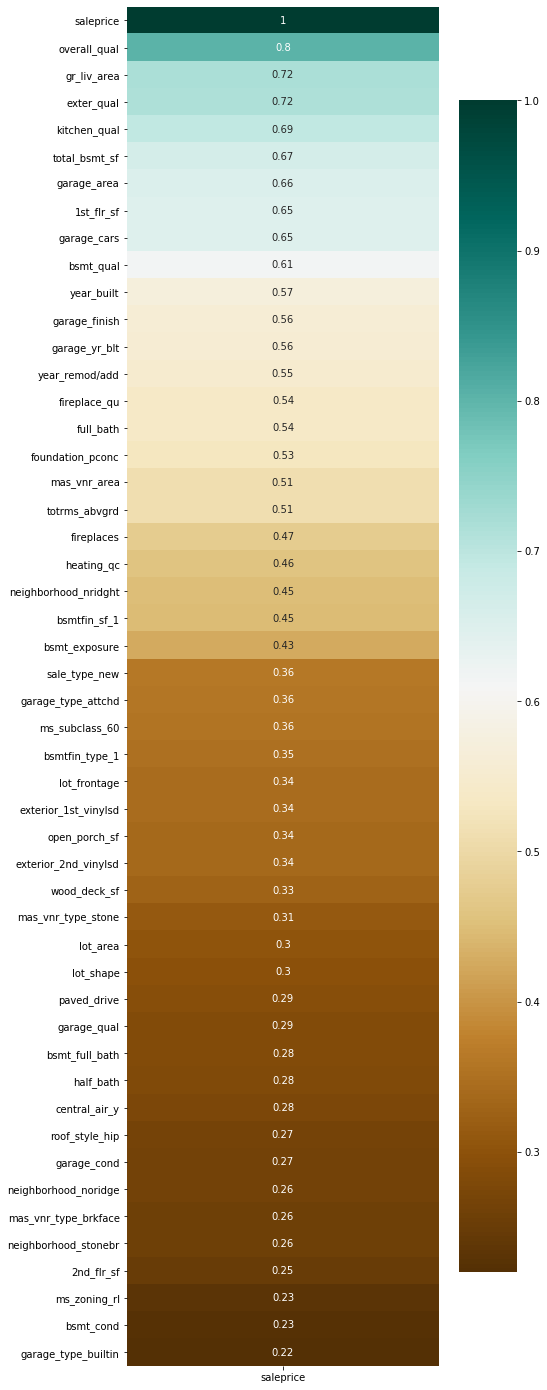

In [73]:
# Heatmap of variables' correlation with 'saleprice' for top 50
plt.figure(figsize=(7,25))
sns.heatmap(df_housing.corr()[['saleprice']].sort_values('saleprice',ascending=False)[:50],
            annot=True,cmap='BrBG');

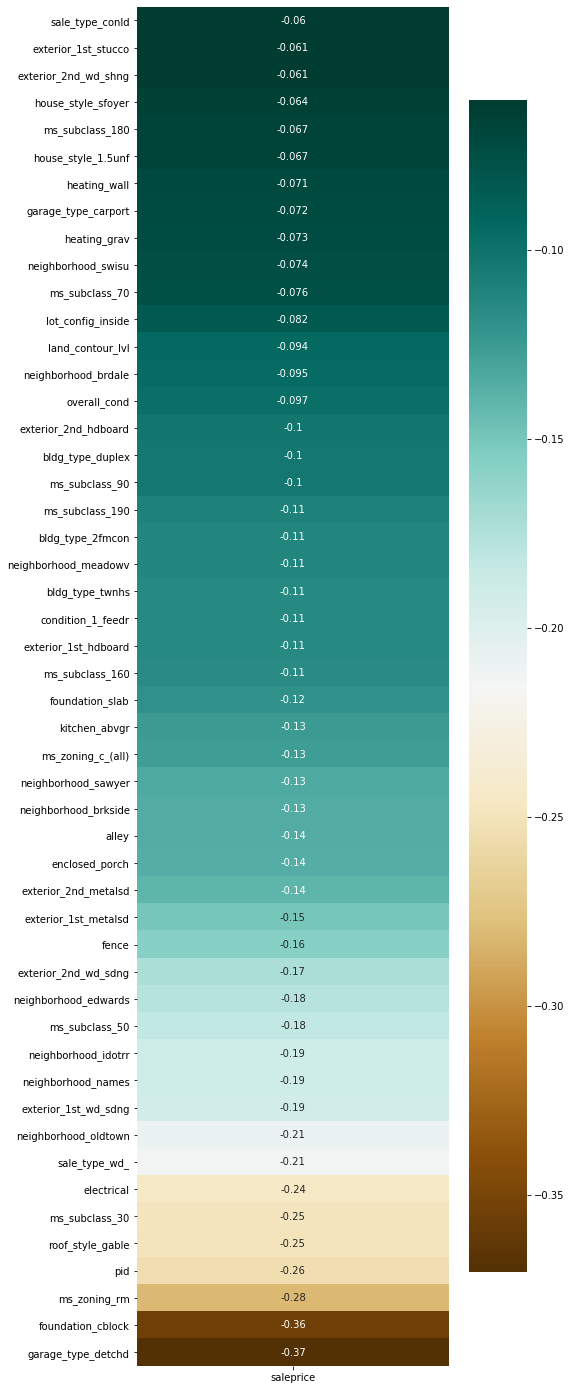

In [74]:
# Heatmap of variables' correlation with 'saleprice' for bottom 50
plt.figure(figsize=(7,25))
sns.heatmap(df_housing.corr()[['saleprice']].sort_values('saleprice',ascending=False)[-50:],
            annot=True,cmap='BrBG');

In [75]:
# df_hous_test_list  = [df_housing.corr()[['saleprice']].sort_values('saleprice',ascending=False)[:18]]

In [76]:
# we would like to plot the top 10 pairplots
df_housing.corr()[['saleprice']].sort_values('saleprice',ascending=False)[:10]

,saleprice
saleprice,1.000000
overall_qual,0.803462
gr_liv_area,0.719463
exter_qual,0.715048
kitchen_qual,0.694295
total_bsmt_sf,0.665116
garage_area,0.655097
1st_flr_sf,0.648252
garage_cars,0.648227
bsmt_qual,0.613236


In [77]:
corr_list_top = ['saleprice', 'overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 
                 'garage_area', '1st_flr_sf', 'garage_cars', 'bsmt_qual']

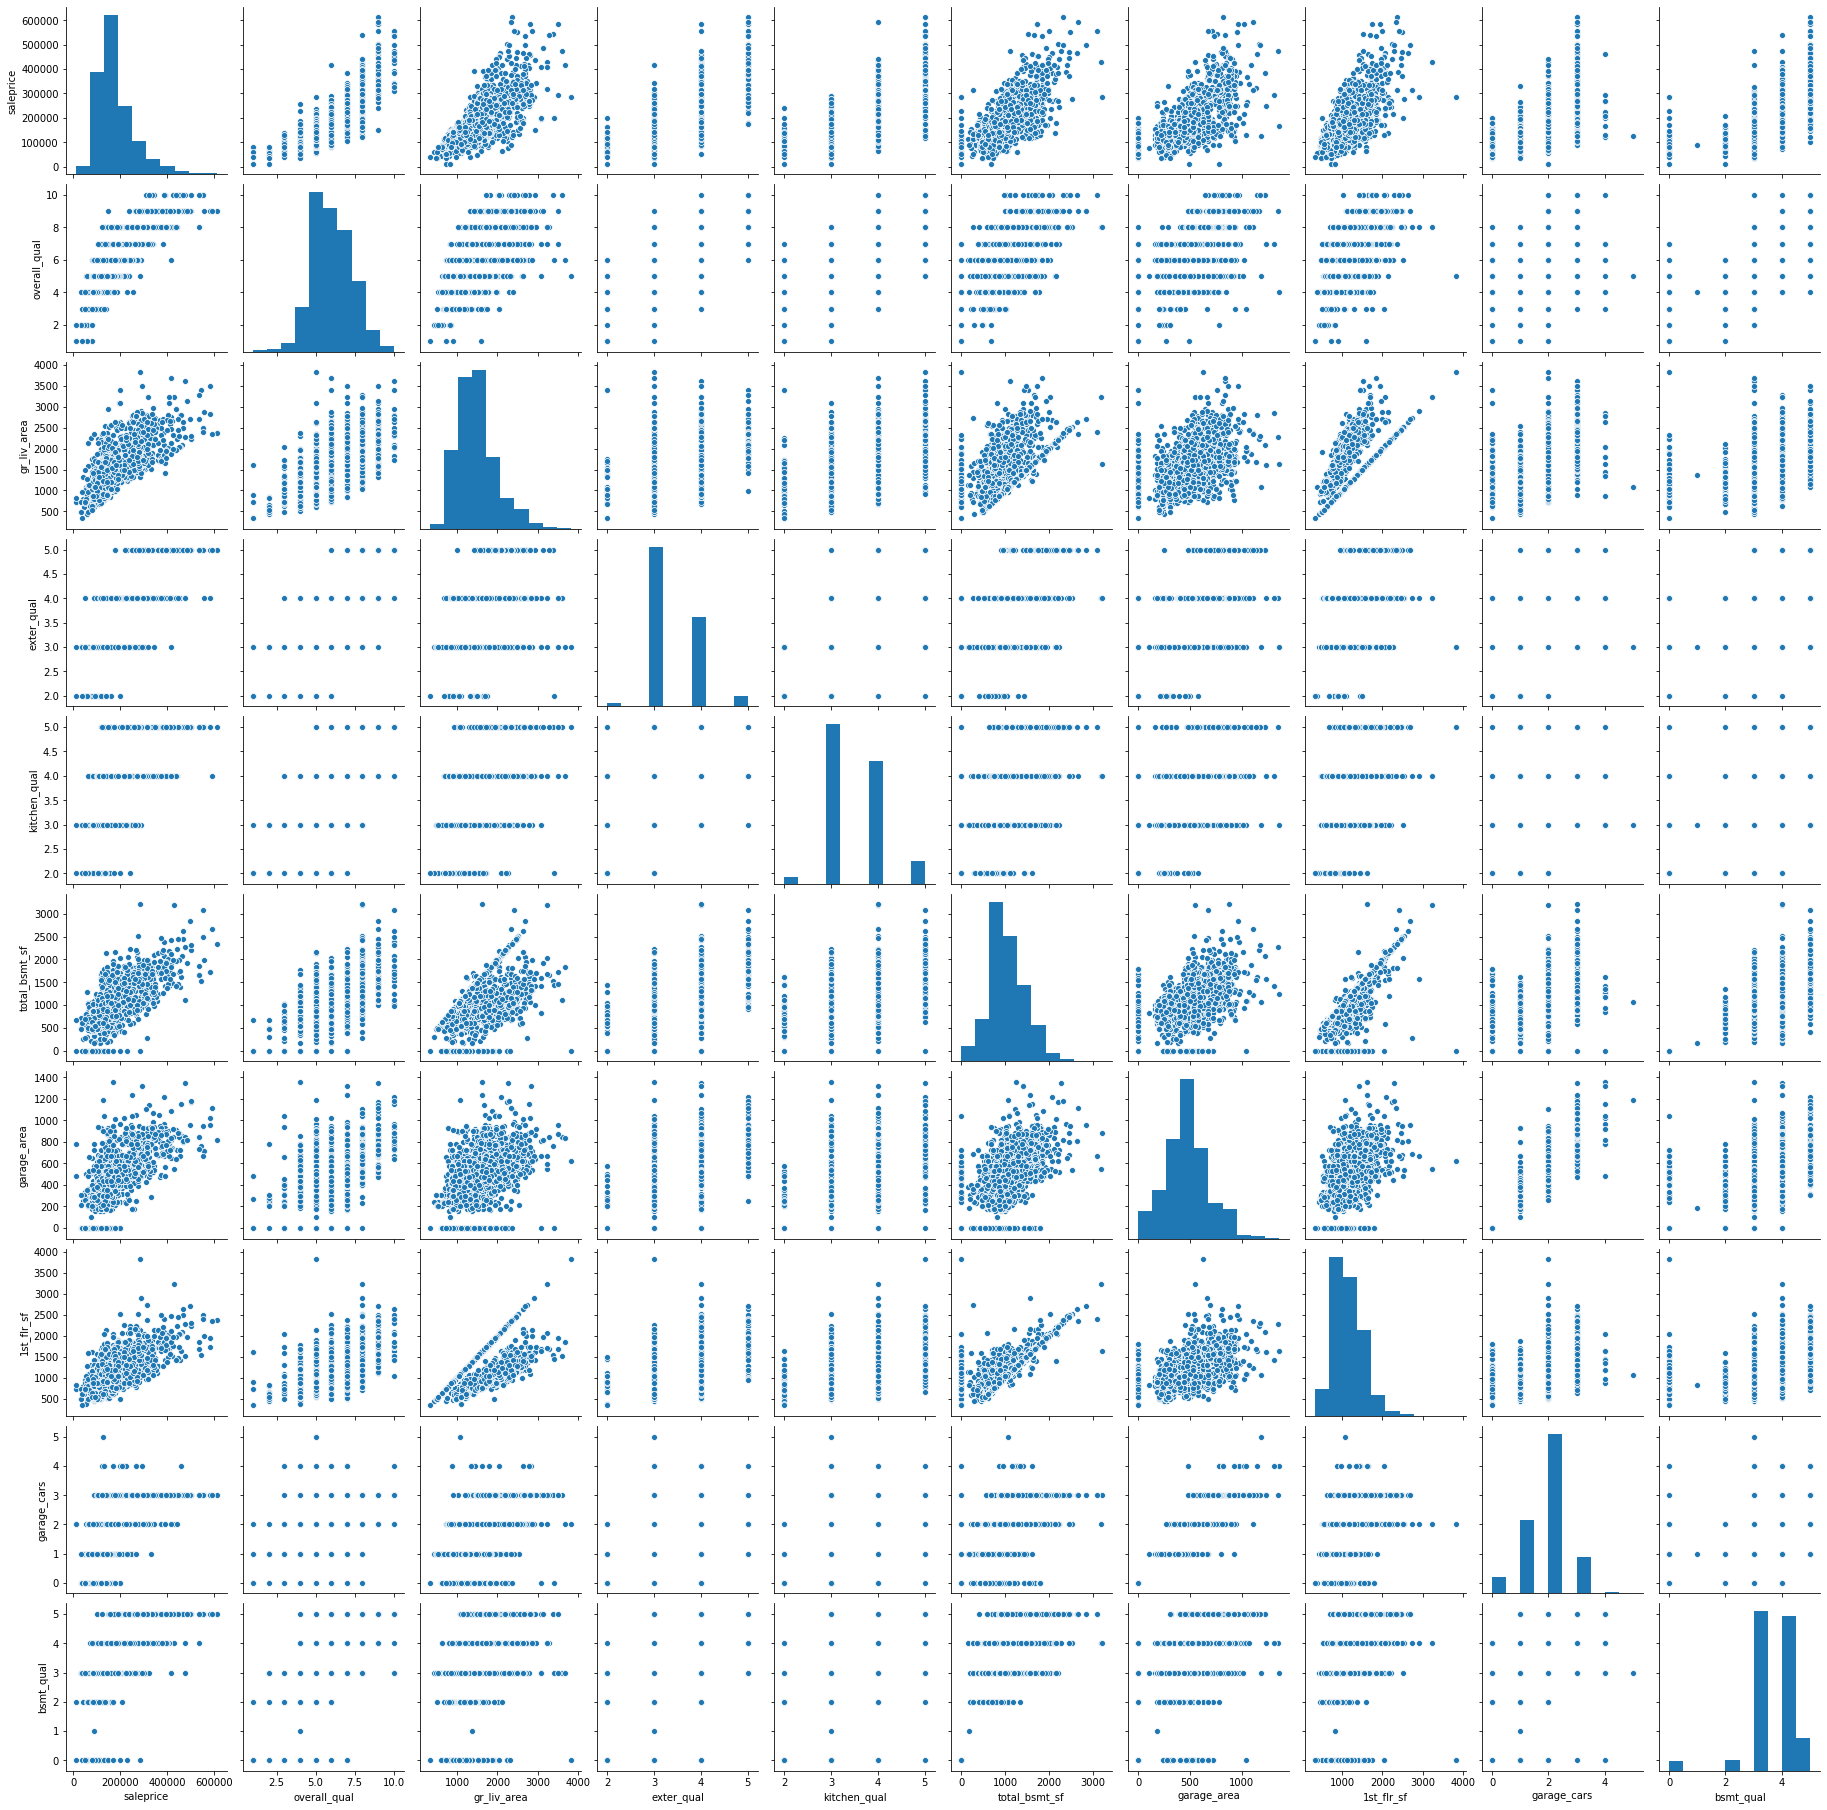

In [78]:
sns.pairplot(df_housing[corr_list_top]);

In [79]:
corr_list_btm = ['saleprice', 'neighborhood_oldtown', 'sale_type_wd_', 'electrical', 'ms_subclass_30', 
                 'roof_style_gable', 'pid', 'ms_zoning_rm', 'foundation_cblock', 'garage_type_detchd']

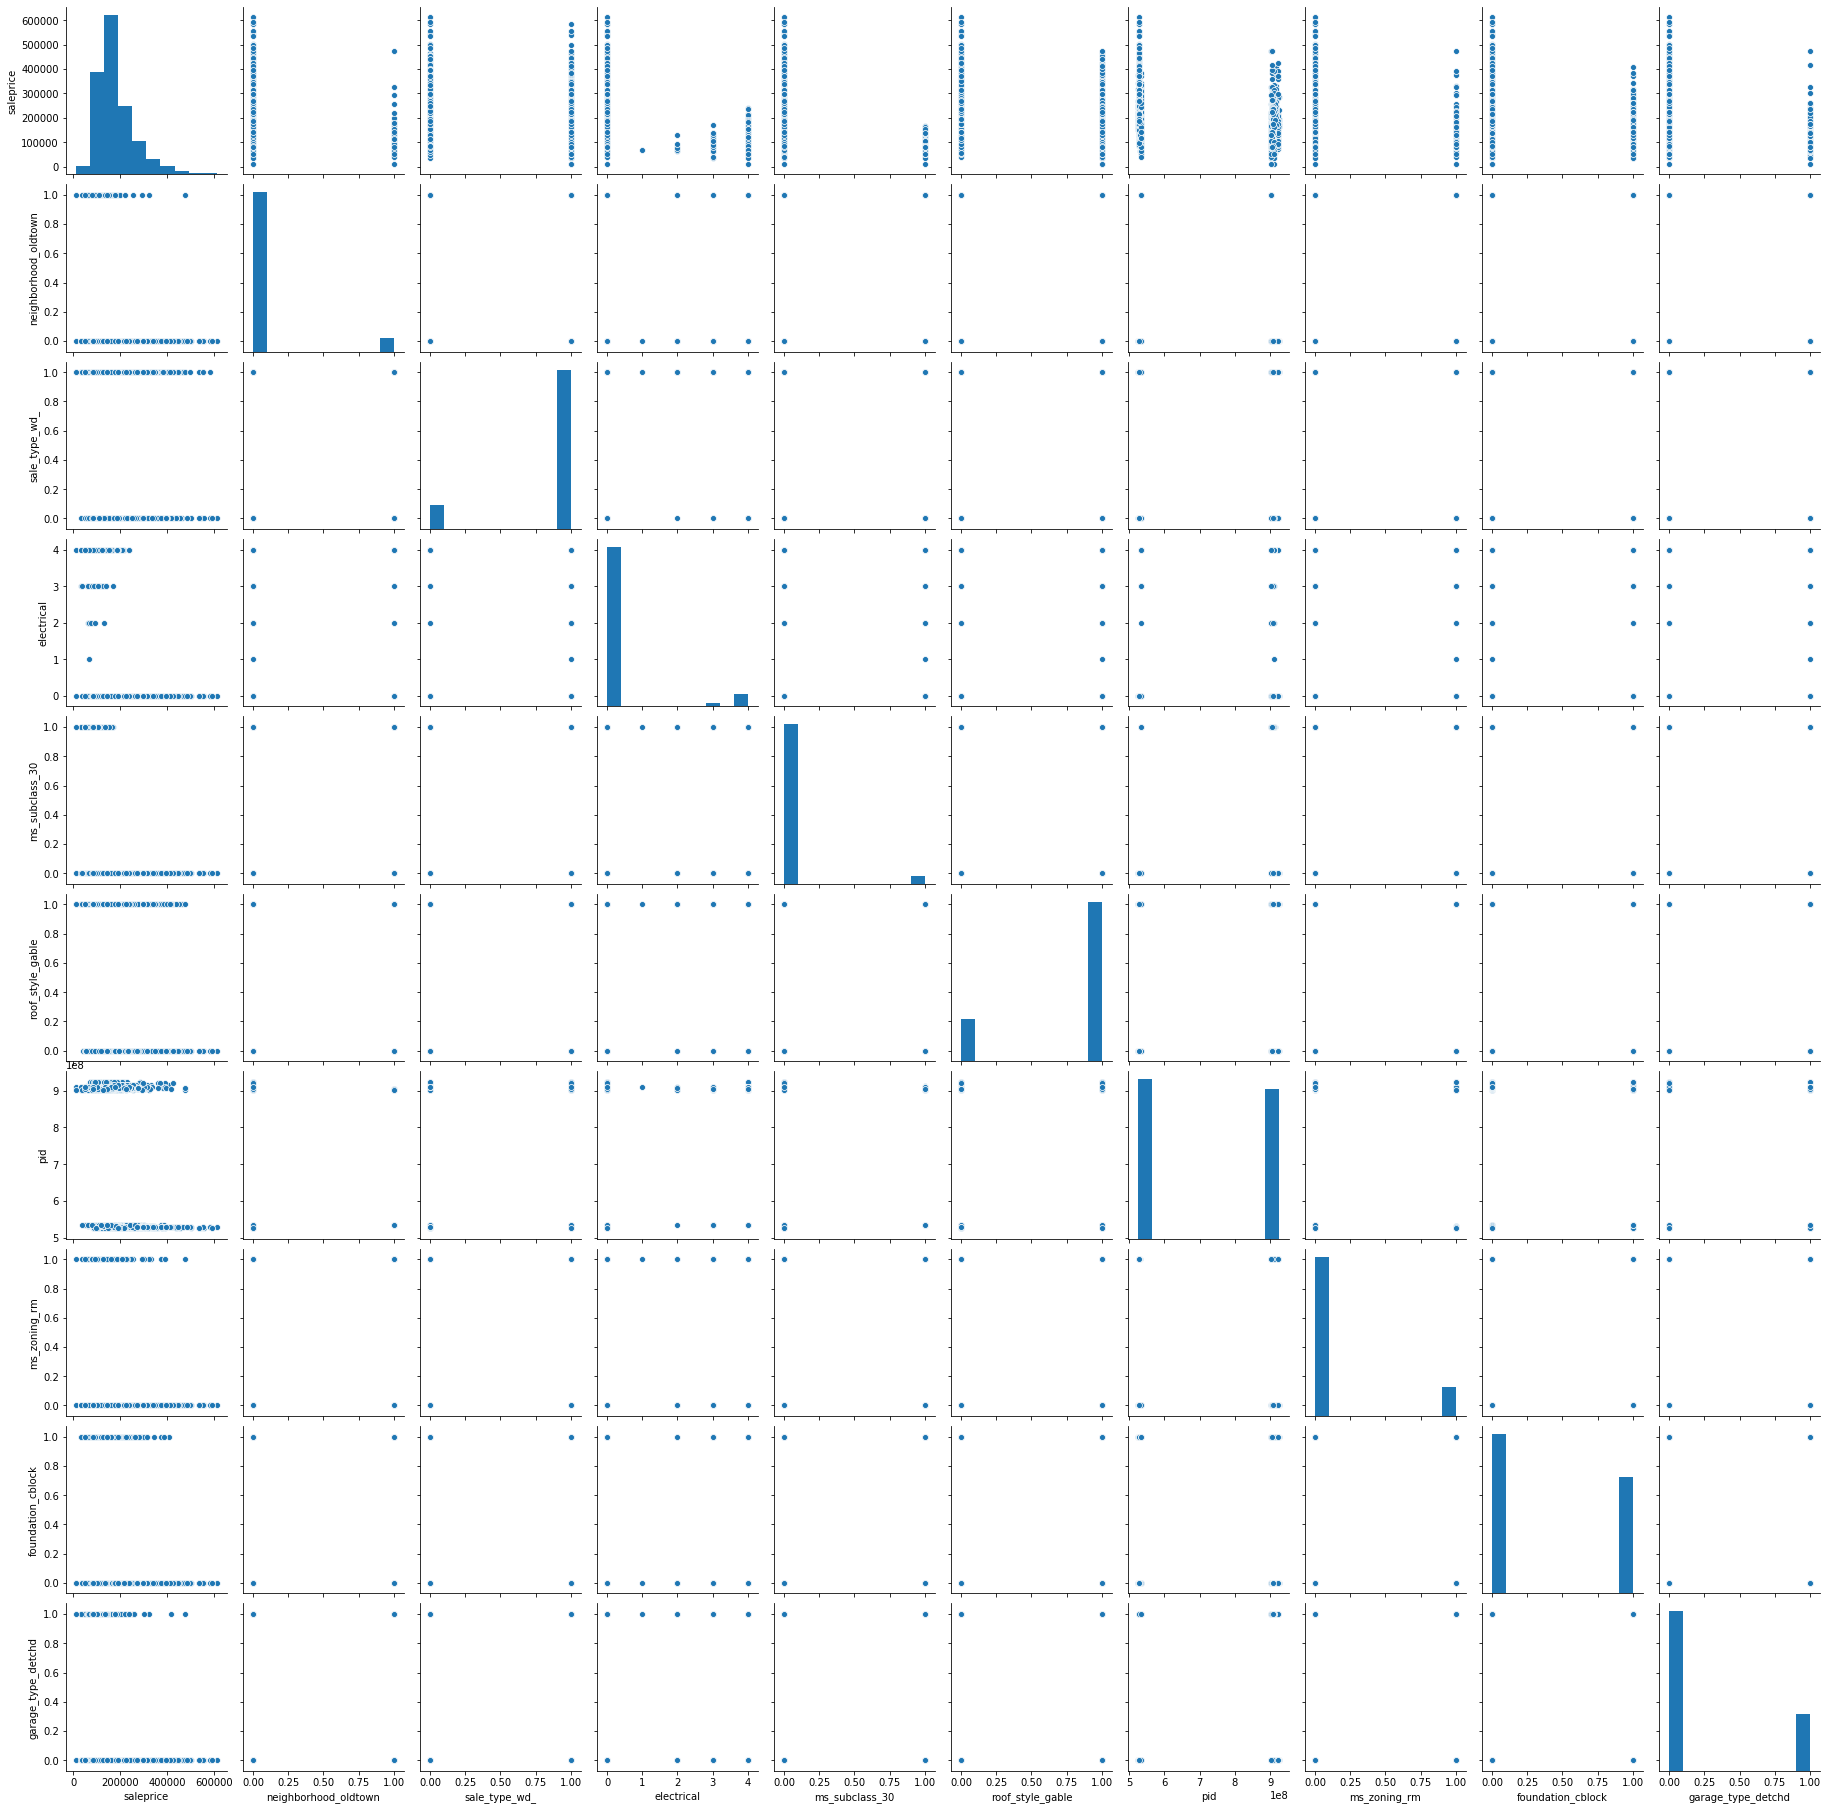

In [80]:
sns.pairplot(df_housing[corr_list_btm]);

From the positive correlation table we can see that in the top 10 features generally, quality features are highly correlated to sale price. This is to be expected as the condition of the house would affect the price that a seller would likely fetch in a housing market. We then also notice another group of features which is size that is also highly correlated to sale price.

From the negative correlation table at first glance we can't seem to discern any patterns within the bottom 10 features, however, upon close inspection we can see that the only factor linking all these features are that they are nominal variables. Each individual feature, however, does not relate much to one another if you dig into the dictionary.

In [81]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None,size=None):    
        
    plt.figure(figsize=(20,12))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette,size=size,sizes=(10, 200))

    plt.title(title,fontsize=25)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20)
    plt.tick_params(labelsize=15)

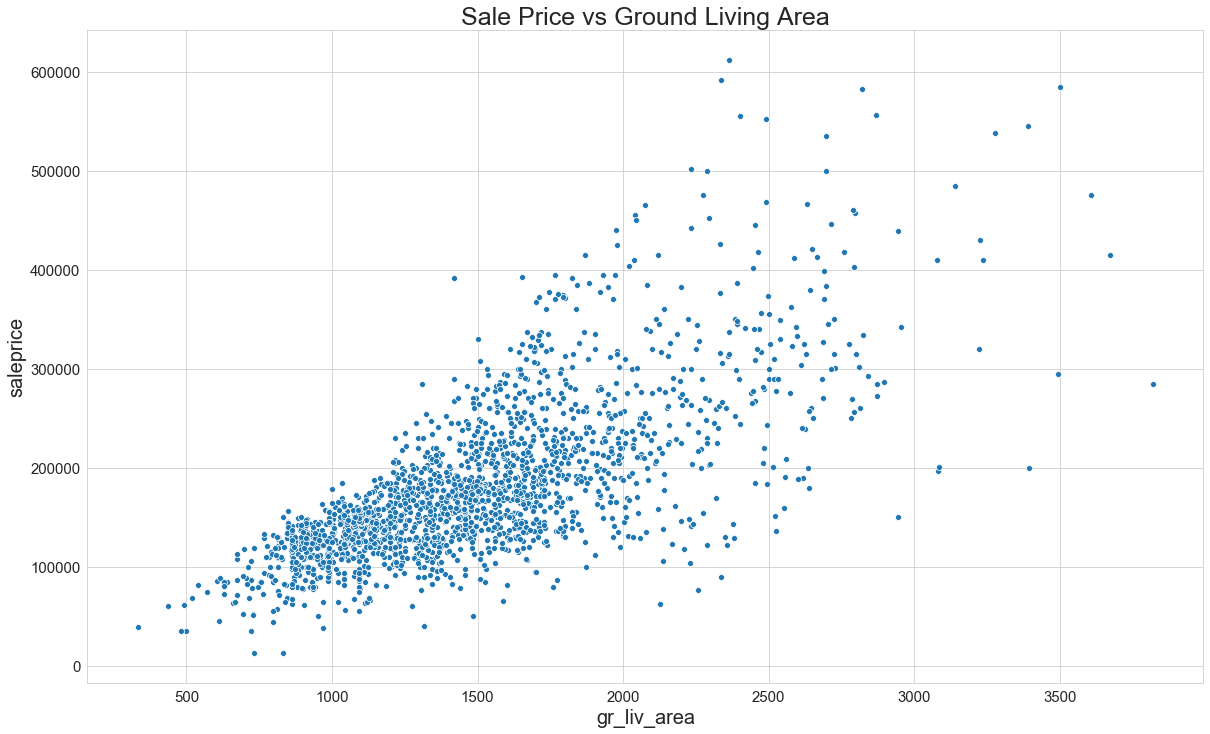

In [82]:
create_scatterplot('Sale Price vs Ground Living Area', df_housing, x = 'gr_liv_area', y = 'saleprice')

In [83]:
def create_boxplot(data,x,y,title=''):
    
    plt.figure(figsize=(20,12))
    
    b = sns.boxplot(data=data,x=x,y=y)
    b.axes.set_title(title,fontsize=25)
    b.set_xlabel(x,fontsize=20)
    b.set_ylabel(y,fontsize=20)
    b.tick_params(labelsize=15)

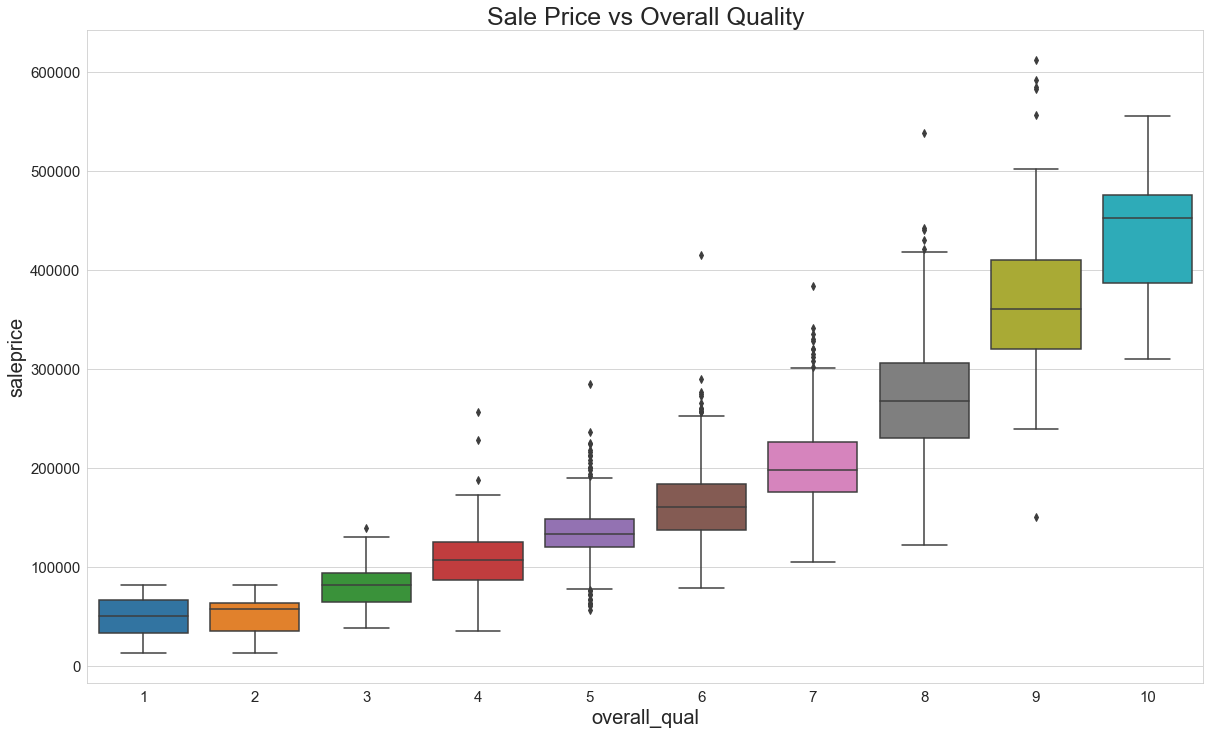

In [84]:
create_boxplot(df_housing, x = 'overall_qual', y = 'saleprice', title = 'Sale Price vs Overall Quality')

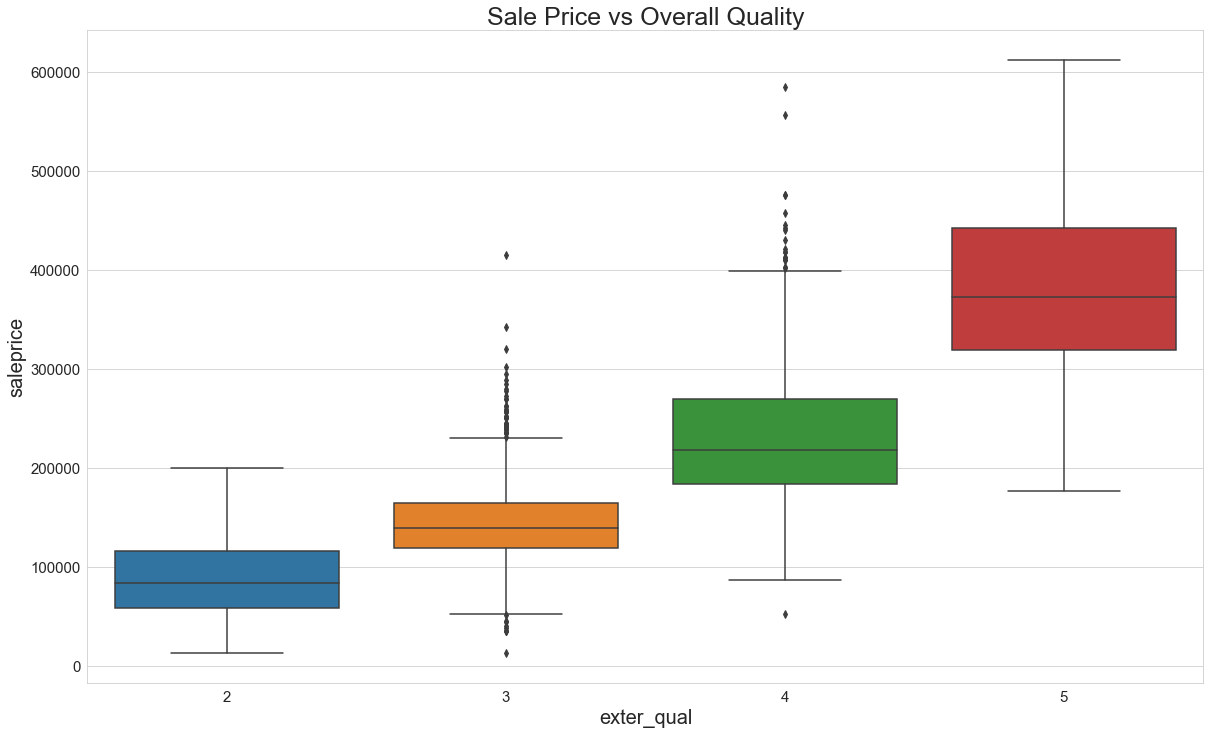

In [85]:
create_boxplot(df_housing, x = 'exter_qual', y = 'saleprice', title = 'Sale Price vs Overall Quality')

I then zoomed into the the top 3 highest correlation features to sale prices and plot the relevant scatterplot or boxplot. We see that there are outliers within both overall quality and external quality. I would make sense to remove these outlier points, however, after reviewing previous lecture materials it was mentioned that it is generally not advisable to instantly decide to remove outliers. Given that the data set is generally that we use are not large in nature.